In [59]:
# Librerias
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
pd.set_option('display.max_columns', None)

## FASE 1. Exploración y limpieza

In [3]:
#Lectura del csv Customer Flight Activity
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
#Lectura del csv Customer Loyalty History
df_loyalty = pd.read_csv("Customer Loyalty History.csv")
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [7]:
# Forma de df_flight

print(f"El número de filas de df_flight es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

El número de filas de df_flight es 405624, y el número de columnas es 10


In [8]:
# Forma de df_loyalty

print(f"El número de filas de df_loyalty es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")

El número de filas de df_loyalty es 16737, y el número de columnas es 16


In [9]:
# Nombre de las columnas que tenemos en df_flight

df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [10]:
# Nombre de las columnas que tenemos en df_loyalty

df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [15]:
# Exploramos la información de las columnas de df_flight

df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [16]:
# Exploramos la información de las columnas de df_loyalty

df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [11]:
# Estadísticas de las columnas numéricas de df_flight, en este caso, como hemos visto con info, todas las columnas son numéricas

df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [17]:

# Estadísticas de las columnas numéricas de df_loyalty

df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [18]:
# Estadísticas de las columnas categóricas de df_loyalty

df_loyalty.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [20]:
# creamos un dataframe con las columnas categoricas de df_loyalty
df_loyalty_cat = df_loyalty.select_dtypes(include = "object")
df_loyalty_cat.head()

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,Standard
1,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,Standard
2,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,Standard
3,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,Standard
4,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,Standard


In [21]:
# creamos una variable con los nombres de las columnas del DataFrame de las variables categóricas del df_loyalty
columnas_categoricas = df_loyalty_cat.columns
print(f"Las columnas del DataFrame de variables categóricas son {columnas_categoricas}")

# Iteramos por las columnas categoricas de df_loyalty para sacar sus valores únicos y sus frecuencias
for columna in columnas_categoricas:
    print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna.upper()}' -----------\n")
    print(f"Sus valores únicos son: {df_loyalty_cat[columna].unique()}\n")
    print(f"Las frecuencias de los valores únicos de las categorías son: {df_loyalty_cat[columna].value_counts()} ")

Las columnas del DataFrame de variables categóricas son Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY' -----------

Sus valores únicos son: ['Canada']

Las frecuencias de los valores únicos de las categorías son: Canada    16737
Name: Country, dtype: int64 
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE' -----------

Sus valores únicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos de las categorías son: Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon

In [22]:
# Estudiamos los valores nulos en df_flight
print("En df_flight el porcentaje de valores nulos es:")
print((df_flight.isnull().sum() / len(df_flight)) * 100)

En df_flight el porcentaje de valores nulos es:
Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


In [23]:
# Estudiamos los valores nulos en df_loyalty
print("En df_loyalty el porcentaje de valores nulos es:")
print((df_loyalty.isnull().sum() / len(df_loyalty)) * 100)

En df_loyalty el porcentaje de valores nulos es:
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64


In [ ]:
# decido hacer el tratamiento de los nulos después del mergeado para que no afecte a la integridad de los datos.

In [27]:
# Filas duplicadas en df_flight
duplicates_flight = df_flight[df_flight.duplicated()]

# Número de filas duplicadas
number_duplicates_flight = len(duplicates_flight)

print(f"El total de filas duplicadas en df_flight: {number_duplicates_flight}")
# Mostrar las filas duplicadas
print("\nFilas duplicadas en df_flight:")

duplicates_flight

El total de filas duplicadas en df_flight: 1864

Filas duplicadas en df_flight:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [32]:
df_flight["Loyalty Number"].duplicated().sum()

388887

In [37]:
# Tratamiento de los duplicados
# Se utiliza drop para eliminar los duplicados, para que los cambios permanezcan en df_flight uso inplace = True

df_flight.drop_duplicates(inplace=True)



In [42]:
# Resetear el índice del dataframe después de eliminar duplicados, hago esto para que los índices no queden desordenados
df_flight.reset_index(drop=True)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0


In [45]:
# Contar el número de registros duplicados despues de la limpieza basado en las colunas
numero_registros_duplicados = df_flight.duplicated().sum()

print(f"El número de duplicados en df_flight: {numero_registros_duplicados}")

El número de duplicados en df_flight: 0


In [48]:
print(f"El número de filas de df_flight después de la limpieza de duplicados es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

El número de filas de df_flight después de la limpieza de duplicados es 403760, y el número de columnas es 10


In [44]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [28]:
# Filas duplicadas en df_loyalty
duplicates_loyalty = df_loyalty[df_loyalty.duplicated()]

# Número de filas duplicadas
number_duplicates_loyalty = len(duplicates_loyalty)

print(f"El total de filas duplicadas en df_loyalty: {number_duplicates_loyalty}")

# Mostrar las filas duplicadas
print("\nFilas duplicadas en df_loyalty:")

duplicates_loyalty

El total de filas duplicadas en df_loyalty: 0

Filas duplicadas en df_loyalty:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [50]:
# Unión de ficheros usando un "right" ya que de esta forma aseguramos toda la información del fichero de los vuelos ya que un mismo cliente puede realizar varios vuelos.
# Mantiene todas las filas del DataFrame derecho (df_flight) y añade las filas del DataFrame izquierdo (df_loyalty) donde hay coincidencias. Si no hay coincidencias, se llenan con NaN.

df_merged = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='right')

In [51]:
df_merged.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


In [52]:
print(f"El número de filas de df_merged después de la unión de los dos dataframes es {df_merged.shape[0]}, y el número de columnas es {df_merged.shape[1]}")

El número de filas de df_merged después de la unión de los dos dataframes es 403760, y el número de columnas es 25


In [53]:
# Columnas del dataframe único
df_merged.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [54]:
# Información del dataframe único
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

In [55]:
# Estadisticos de las columnas numéricas del dataframe único
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


In [56]:
#Estadisticos de las columnas categóricas del dataframe único
df_merged.describe(include = "object").T

,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [57]:
# Estudiamos los valores nulos en el dataframe único
print("En df_merged el porcentaje de valores nulos es:")
print((df_merged.isnull().sum() / len(df_merged)) * 100)

En df_merged el porcentaje de valores nulos es:
Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Re

In [58]:
# Creamos un dataframe solo con las columnas que contengan nulos

porcentaje_nulos = (df_merged.isnull().sum() / df_merged.shape[0]) * 100

df_nulos = pd.DataFrame(porcentaje_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


In [60]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_numericos = df_merged[df_merged.columns[df_merged.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_numericos)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


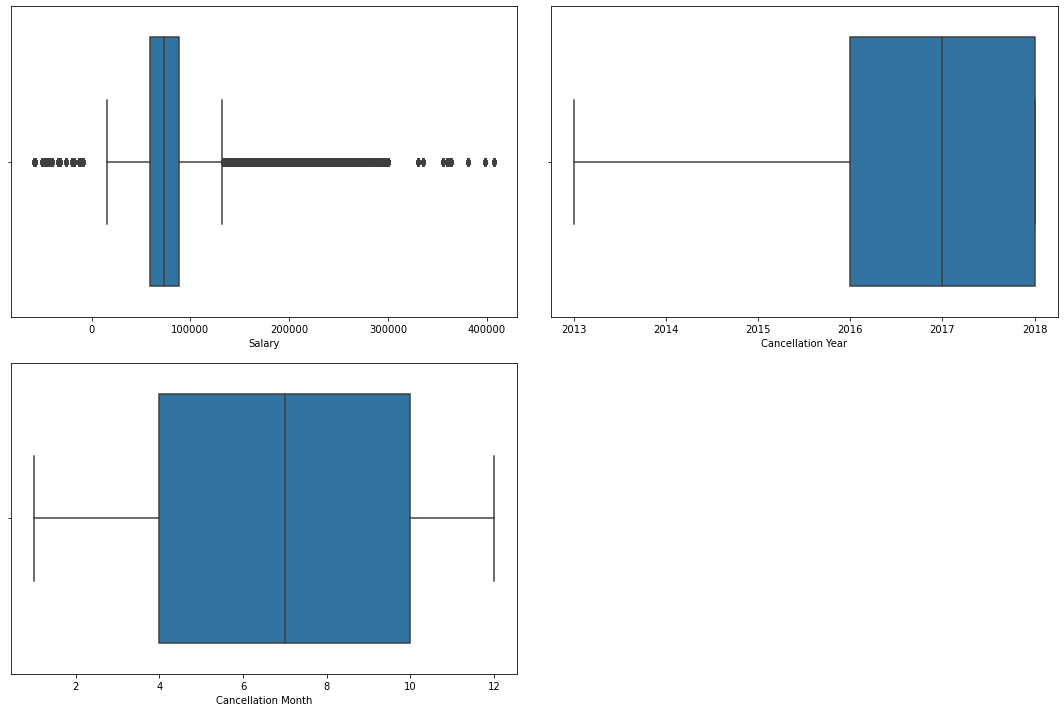

In [66]:
# vemos si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 


fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_numericos):
    sns.boxplot(x = col, data = df_merged, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

In [67]:
# Las columnas Cancellation Year y Cancellation Month tienen más de un 87% de nulos, además no las necesitamos para nuestro analisis, por lo que las elimino.

df_merged.drop("Cancellation Year", axis = 1, inplace = True)

In [68]:
df_merged.drop("Cancellation Month", axis = 1, inplace = True)

In [70]:
df_merged.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [71]:
#  Para Salary usaré la mediana, ya que es más útil si los datos están sesgados

df_merged['Salary'].fillna(df_merged['Salary'].median(), inplace=True)

In [73]:
print("En df_merged despues de tratar los nulos este es el resultado:")
print((df_merged.isnull().sum() / len(df_merged)) * 100)

En df_merged despues de tratar los nulos este es el resultado:
Loyalty Number                 0.0
Country                        0.0
Province                       0.0
City                           0.0
Postal Code                    0.0
Gender                         0.0
Education                      0.0
Salary                         0.0
Marital Status                 0.0
Loyalty Card                   0.0
CLV                            0.0
Enrollment Type                0.0
Enrollment Year                0.0
Enrollment Month               0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


In [76]:
# Filtrar las columnas categóricas

categoricas_columnas = df_merged.select_dtypes(include='object').columns 
categoricas_columnas

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'Enrollment Type'],
      dtype='object')

In [77]:
# Vamos a analizar los valores de las columnas categóricas para ver posibles valores anomalos, vacios o outliers.

for col in categoricas_columnas:
    print(f"Valores únicos y recuento de frecuencias para la columna '{col.upper()}':")
    print(df_merged[col].value_counts()) 
    print("------------------------------------------------------------------")

Valores únicos y recuento de frecuencias para la columna 'COUNTRY':
Canada    403760
Name: Country, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'PROVINCE':
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: Province, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'CITY':
Toronto           80775
Vancouver         62314
Montreal          49687
Winnipeg          15900
Whistler          13994
Halifax           12507
Ottawa            12262
Edmonton          11768
Trenton           11710
Quebec City       11698
Dawson Cr

In [78]:
# Filtrar las columnas numéricas
numericas_columnas = df_merged.select_dtypes(include=['number']).columns
numericas_columnas

Index(['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year',
       'Enrollment Month', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [80]:
# Vamos a analizar los valores de las columnas numéricas para ver posibles valores anomalos, vacios o outliers.

for col in numericas_columnas:
    print(f"Valores únicos y recuento de frecuencias para la columna '{col.upper()}':")
    print(df_merged[col].value_counts()) 
    print("------------------------------------------------------------------")

Valores únicos y recuento de frecuencias para la columna 'LOYALTY NUMBER':
974875    48
736504    48
890702    48
617489    48
200519    47
          ..
428402    24
428452    24
428520    24
428523    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'SALARY':
73479.0     102308
101933.0       552
61809.0        336
51573.0        336
62283.0        336
             ...  
22425.0         24
58153.0         24
57156.0         24
40991.0         24
56345.0         24
Name: Salary, Length: 5890, dtype: int64
------------------------------------------------------------------
Valores únicos y recuento de frecuencias para la columna 'CLV':
8564.77     312
14024.36    311
4330.39     309
3873.65     308
25464.82    305
           ... 
2511.94      24
3657.59      24
6656.20      24
5052.38      24
8409.07      24
Name: CLV, Length: 7984, dtype: int64
---

In [81]:
# La columna Country tiene el mismo valor en todas sus filas por lo que vamos a eliminarla, además no la necesitamos para nuestro analisis posterior

df_merged.drop("Country", axis = 1, inplace = True)

In [82]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Province                     403760 non-null  object 
 2   City                         403760 non-null  object 
 3   Postal Code                  403760 non-null  object 
 4   Gender                       403760 non-null  object 
 5   Education                    403760 non-null  object 
 6   Salary                       403760 non-null  float64
 7   Marital Status               403760 non-null  object 
 8   Loyalty Card                 403760 non-null  object 
 9   CLV                          403760 non-null  float64
 10  Enrollment Type              403760 non-null  object 
 11  Enrollment Year              403760 non-null  int64  
 12  Enrollment Month             403760 non-null  int64  
 13 

In [93]:
col_num_df = df_merged.select_dtypes(include=["number"])
columnas_negativas = []
for col in col_num_df.columns:
    if(col_num_df[col] < 0).any():
        columnas_negativas.append(col)
           

In [94]:
columnas_negativas

['Salary']

In [91]:
# Valores negativos en Salary
negative_count = (df_merged['Salary'] < 0).sum()
print(f"Número de valores negativos en Salary: {negative_count}")

Número de valores negativos en Salary: 480


In [ ]:
# Cambiamos a absolutos los valores negativos

df_merged['salary'] = df_merged['salary'].abs() 



In [ ]:
#Estandarizacion de columnas
#Estandarización de filas
#tipos de datos
#cambiar enrolloment, cancellation y flight a meses en lugar de numeros??
#float redondear
